<a href="https://colab.research.google.com/github/ghfarr/uasBig-Data-Predictive-Analytics-Lanjut/blob/main/UasBig_Data_Predictive_Analytics_Lanjut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOMOR 1

In [ ]:
import pandas as pd


file_path = '/content/diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)


data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


(None,
    gender   age  hypertension  heart_disease smoking_history    bmi  \
 0  Female  80.0             0              1           never  25.19   
 1  Female  54.0             0              0         No Info  27.32   
 2    Male  28.0             0              0           never  27.32   
 3  Female  36.0             0              0         current  23.45   
 4    Male  76.0             1              1         current  20.14   
 
    HbA1c_level  blood_glucose_level  diabetes  
 0          6.6                  140         0  
 1          6.6                   80         0  
 2          5.7                  158         0  
 3          5.0                  155         0  
 4          4.8                  155         0  )

In [ ]:
null_values = data.isnull().sum()
data_types = data.dtypes


data.rename(columns={
    'gender': 'Gender',
    'age': 'Age',
    'hypertension': 'Hypertension',
    'heart_disease': 'HeartDisease',
    'smoking_history': 'SmokingHistory',
    'bmi': 'BMI',
    'HbA1c_level': 'HbA1cLevel',
    'blood_glucose_level': 'BloodGlucoseLevel',
    'diabetes': 'Diabetes'
}, inplace=True)


summary_statistics = data.describe()


numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()


null_values, data_types, summary_statistics, correlation_matrix


(Gender               0
 Age                  0
 Hypertension         0
 HeartDisease         0
 SmokingHistory       0
 BMI                  0
 HbA1cLevel           0
 BloodGlucoseLevel    0
 Diabetes             0
 dtype: int64,
 Gender                object
 Age                  float64
 Hypertension           int64
 HeartDisease           int64
 SmokingHistory        object
 BMI                  float64
 HbA1cLevel           float64
 BloodGlucoseLevel      int64
 Diabetes               int64
 dtype: object,
                  Age  Hypertension   HeartDisease            BMI  \
 count  100000.000000  100000.00000  100000.000000  100000.000000   
 mean       41.885856       0.07485       0.039420      27.320767   
 std        22.516840       0.26315       0.194593       6.636783   
 min         0.080000       0.00000       0.000000      10.010000   
 25%        24.000000       0.00000       0.000000      23.630000   
 50%        43.000000       0.00000       0.000000      27.320000   


<ipython-input-6-1050fc1fe90f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")


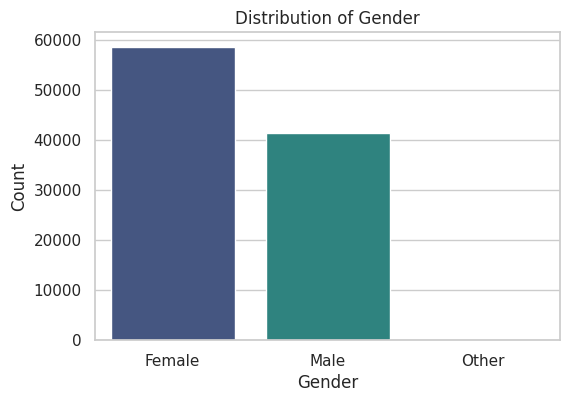

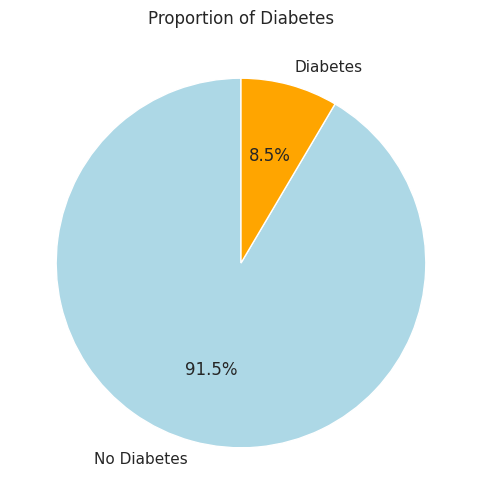

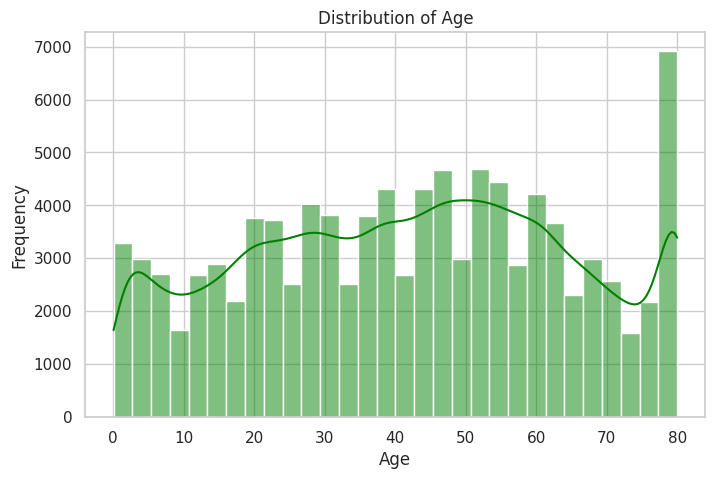

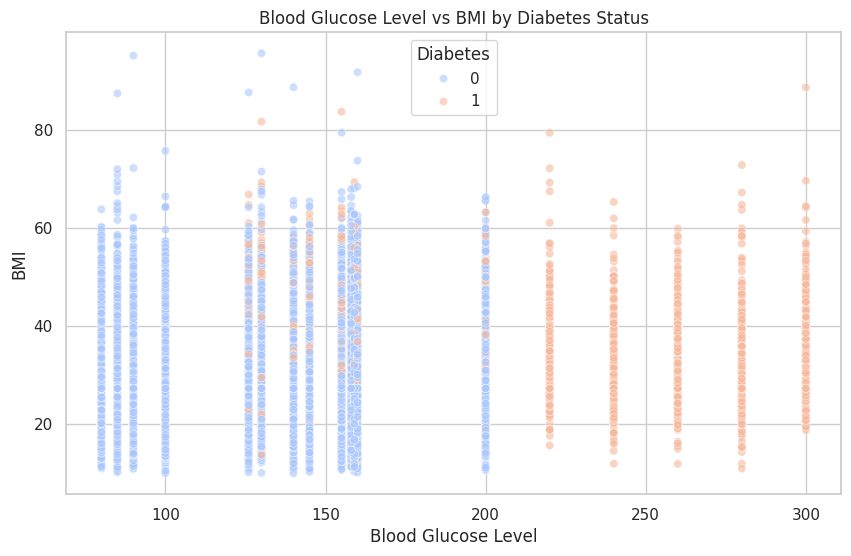

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
gender_counts = data['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="viridis")
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(6, 6))
diabetes_counts = data['Diabetes'].value_counts()
labels = ["No Diabetes", "Diabetes"]
plt.pie(diabetes_counts, labels=labels, autopct="%1.1f%%", colors=["lightblue", "orange"], startangle=90)
plt.title("Proportion of Diabetes")
plt.show()


plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, bins=30, color="green")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x="BloodGlucoseLevel", y="BMI", hue="Diabetes", palette="coolwarm", alpha=0.6)
plt.title("Blood Glucose Level vs BMI by Diabetes Status")
plt.xlabel("Blood Glucose Level")
plt.ylabel("BMI")
plt.legend(title="Diabetes")
plt.show()


NOMOR 2


a.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


file_path = '/content/diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)


label_encoders = {}
for col in ['gender', 'smoking_history']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop(columns=['diabetes'])
y = data['diabetes']


scaler = StandardScaler()
X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(
    X[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosted Trees': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=500),
    'Multilayer Perceptron': MLPClassifier(random_state=42, max_iter=500)
}


metrics = {}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None


    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    metrics[name] = {
        'AUC': auc,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }


metrics


{'Random Forest': {'AUC': 0.9636454374546455,
  'Accuracy': 0.97065,
  'F1 Score': 0.800949474398101,
  'Precision': 0.951651893634166,
  'Recall': 0.6914519906323185},
 'Gradient Boosted Trees': {'AUC': 0.9794134226912776,
  'Accuracy': 0.97245,
  'F1 Score': 0.809671848013817,
  'Precision': 0.987363100252738,
  'Recall': 0.6861826697892272},
 'Logistic Regression': {'AUC': 0.9612151605416376,
  'Accuracy': 0.95875,
  'F1 Score': 0.7173689619732785,
  'Precision': 0.8645747316267548,
  'Recall': 0.6129976580796253},
 'Multilayer Perceptron': {'AUC': 0.9778059610400319,
  'Accuracy': 0.9726,
  'F1 Score': 0.8112947658402204,
  'Precision': 0.9849498327759197,
  'Recall': 0.689695550351288}}

b.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score

best_models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosted Trees': GradientBoostingClassifier(random_state=42)
}


param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosted Trees': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    }
}


tuned_metrics = {}


for name, model in best_models.items():
    print(f"Melakukan tuning pada model: {name}...")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=3,
        scoring='f1',
        verbose=1,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)


    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None


    auc = roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else None
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    tuned_metrics[name] = {
        'Best Params': grid_search.best_params_,
        'AUC': auc,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Precision': precision,
        'Recall': recall
    }


tuned_metrics


Melakukan tuning pada model: Random Forest...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Melakukan tuning pada model: Gradient Boosted Trees...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


{'Random Forest': {'Best Params': {'max_depth': 10,
   'min_samples_split': 5,
   'n_estimators': 50},
  'AUC': 0.9718819920252824,
  'Accuracy': 0.9723,
  'F1 Score': 0.806429070580014,
  'Precision': 1.0,
  'Recall': 0.6756440281030445},
 'Gradient Boosted Trees': {'Best Params': {'learning_rate': 0.1,
   'max_depth': 3,
   'n_estimators': 100},
  'AUC': 0.9794134226912776,
  'Accuracy': 0.97245,
  'F1 Score': 0.809671848013817,
  'Precision': 0.987363100252738,
  'Recall': 0.6861826697892272}}

c

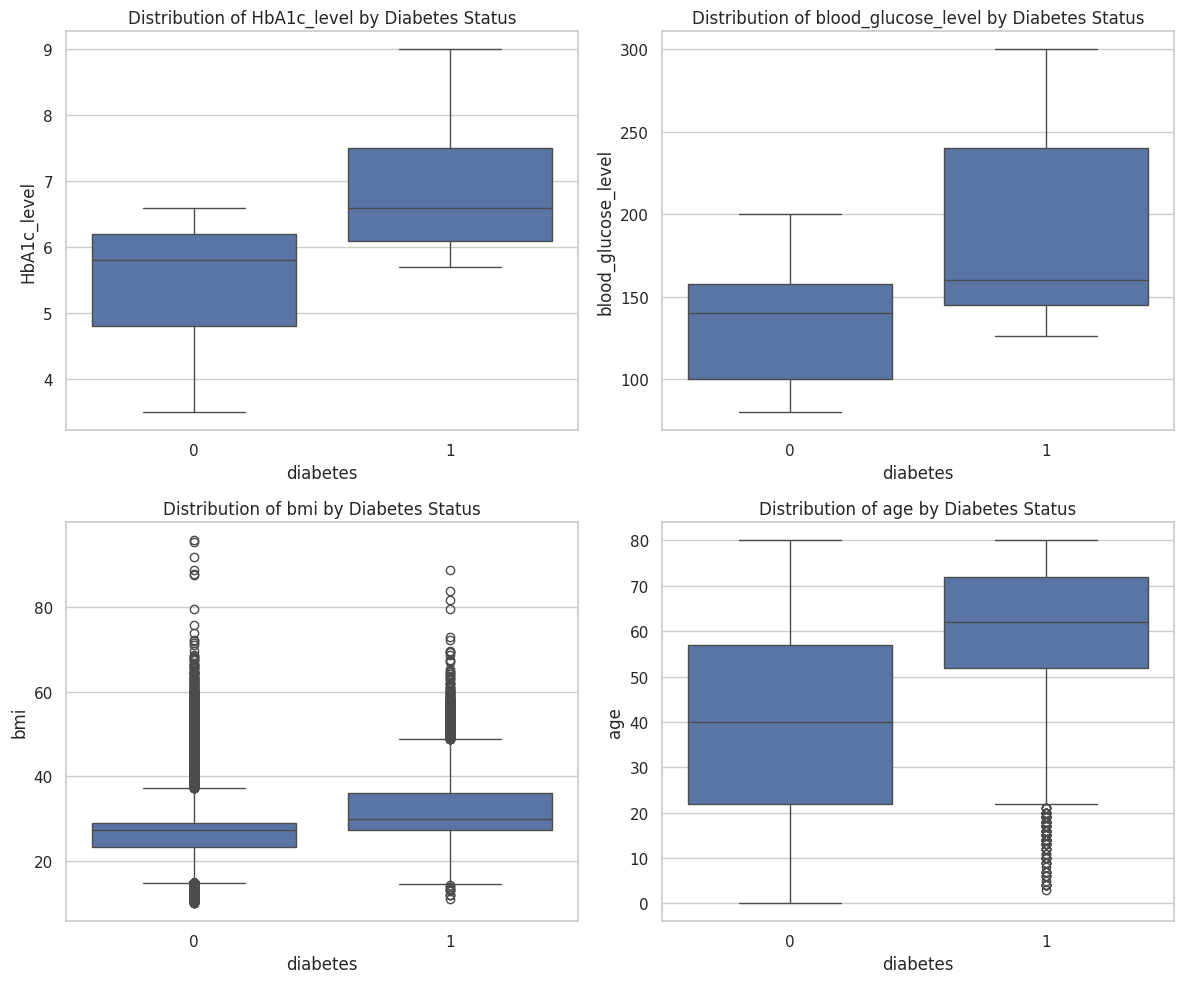

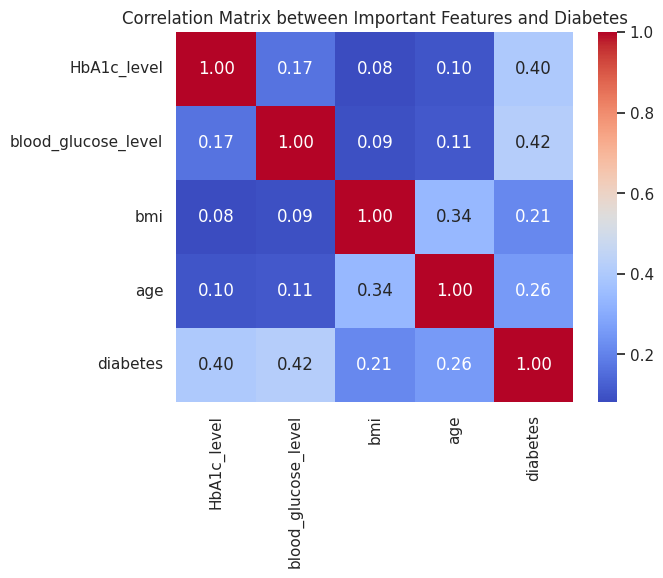

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


important_features = ['HbA1c_level', 'blood_glucose_level', 'bmi', 'age']


plt.figure(figsize=(12, 10))
for i, feature in enumerate(important_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='diabetes', y=feature, data=data)
    plt.title(f'Distribution of {feature} by Diabetes Status')

plt.tight_layout()
plt.show()


correlation_matrix = data[important_features + ['diabetes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix between Important Features and Diabetes")
plt.show()
